# Analyzing Restaurant Booking Trends with Boosting Algorithms

### Context


### Dataset Description

The dataset you will analyze contains a variety of attributes related to restaurant bookings. These details offer insights into customer preferences, booking patterns, and cancellation trends. Each booking record is characterized by several features:

### Booking Attributes:
- **id:** Unique identifier for each booking.
- **no_of_adults:** Number of adults per booking.
- **no_of_children:** Number of children per booking.
- **no_of_weekend_nights:** Number of weekend nights booked.
- **no_of_week_nights:** Number of weekday nights booked.
- **type_of_meal_plan:** Type of meal plan selected (e.g., bed and breakfast, all-inclusive).
- **required_car_parking_space:** Indicates if a parking space was required.
- **room_type_reserved:** Type of room reserved.
- **lead_time:** Number of days between the booking date and the arrival date.
- **arrival_year, arrival_month, arrival_date:** Date details for when the booking is scheduled.
- **market_segment_type:** The market segment from which the booking originated.
- **repeated_guest:** Flag indicating if the guest has booked before.
- **no_of_previous_cancellations:** Number of prior cancellations by the guest.
- **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the guest.
- **avg_price_per_room:** Average price per room type.
- **no_of_special_requests:** Number of special requests made by the guest.
- **booking_status:** Status of the booking ( confirmed = 0, canceled = 1).

Your objective is to use boosting techniques to predict the 'booking_status' and analyze factors that influence booking behaviors. This analysis will help in identifying key trends that could influence policy adjustments, promotional strategies, and operational improvements.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("./../data/booking.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [26]:
ZAdu_xChd = ['no_of_adults', 'no_of_children']
len(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)] )

16

In [29]:
df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)][ZAdu_xChd].value_counts()

no_of_adults  no_of_children
0             0                 16
Name: count, dtype: int64

In [37]:
df_booking_cancellations = df[df['booking_status'] == 1]
df_booking_cancellations.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
5,5,0,2,2,5,0,0,2,215,2018,10,6,1,0,0,0,212.06,0,1
6,6,2,0,0,1,2,0,0,320,2018,8,18,0,0,0,0,115.00,1,1
11,11,2,2,0,1,0,0,3,69,2018,8,12,1,0,0,0,221.30,1,1
12,12,2,1,1,1,0,0,0,50,2018,4,30,1,0,0,0,121.50,1,1


In [ ]:
df.booking_status

In [69]:
df_1 = df.groupby(['arrival_month',  'booking_status'])[].agg('count')
df_1

id  no_of_adults  no_of_children  \
arrival_month booking_status                                       
1             0                747           747             747   
              1                 58            58              58   
2             0                884           884             884   
              1                317           317             317   
3             0               1577          1577            1577   
              1                624           624             624   
4             0               1924          1924            1924   
              1               1082          1082            1082   
5             0               1955          1955            1955   
              1               1337          1337            1337   
6             0               1945          1945            1945   
              1               1411          1411            1411   
7             0               2463          2463            2463   
              1               2218          2218            2218   
8             0               2722          2722            2722   
              1               3041          3041            3041   
9             0               2981          2981            2981   
              1               2167          2167            2167   
10            0               3530          3530            3530   
              1               2923          2923            2923   
11            0               2029          2029            2029   
              1                774           774             774   
12            0               2839          2839            2839   
              1                552           552             552   

                              no_of_weekend_nights  no_of_week_nights  \
arrival_month booking_status                                            
1             0                                747                747   
              1                                 58                 58   
2             0                                884                884   
              1                                317                317   
3             0                               1577               1577   
              1                                624                624   
4             0                               1924               1924   
              1                               1082               1082   
5             0                               1955               1955   
              1                               1337               1337   
6             0                               1945               1945   
              1                               1411               1411   
7             0                               2463               2463   
              1                               2218               2218   
8             0                               2722               2722   
              1                               3041               3041   
9             0                               2981               2981   
              1                               2167               2167   
10            0                               3530               3530   
              1                               2923               2923   
11            0                               2029               2029   
              1                                774                774   
12            0                               2839               2839   
              1                                552                552   

                              type_of_meal_plan  required_car_parking_space  \
arrival_month booking_status                                                  
1             0                             747                         747   
              1                              58                          58   
2             0                             884 

In [68]:
df_1

arrival_month                           24
booking_status                          24
id                                      24
no_of_adults                            24
no_of_children                          24
no_of_weekend_nights                    24
no_of_week_nights                       24
type_of_meal_plan                       24
required_car_parking_space              24
room_type_reserved                      24
lead_time                               24
arrival_year                            24
arrival_date                            24
market_segment_type                     24
repeated_guest                          24
no_of_previous_cancellations            24
no_of_previous_bookings_not_canceled    24
avg_price_per_room                      24
no_of_special_requests                  24
dtype: int64

<Axes: ylabel='booking_status'>

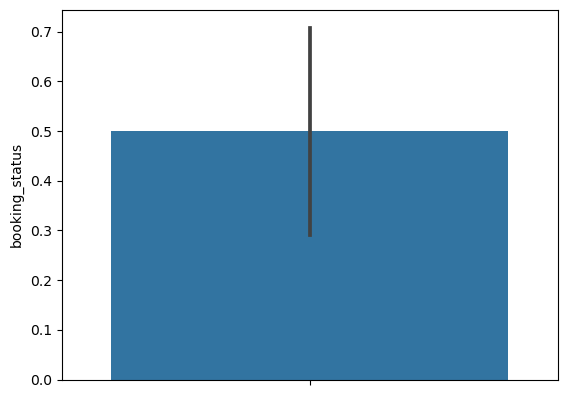

In [64]:
sns.barplot(y='booking_status', data=df_1, y)